In [134]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [135]:
from sklearn.datasets import fetch_openml
housing_dataset = fetch_openml(name="house_prices", as_frame=True)
print(housing_dataset.DESCR)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

/Users/cameliefeghali/Library/Python/3.8/lib/python/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [136]:
print(housing_dataset.keys())
print(housing_dataset.target_names)

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
['SalePrice']


In [137]:
df = pd.DataFrame(housing_dataset.data, columns=housing_dataset.feature_names)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal


In [138]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [139]:
df_features = df[
    [
        'LotArea', 
        'OverallQual', 
        'OverallCond', 
        'YearBuilt', 
        'YearRemodAdd', 
        '1stFlrSF', 
        '2ndFlrSF',
        'LowQualFinSF',
        'GrLivArea',
        'BsmtFullBath',
        'BsmtHalfBath',
        'FullBath',
        'HalfBath',
        'BedroomAbvGr',
        'KitchenAbvGr',
        'KitchenQual'
    ]
]

In [140]:
df_target = pd.DataFrame(housing_dataset.target, columns=housing_dataset.target_names)

In [141]:
df = df_features.join(df_target)
df

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,SalePrice
0,8450,7,5,2003,2003,856,854,0,1710,1,0,2,1,3,1,Gd,208500
1,9600,6,8,1976,1976,1262,0,0,1262,0,1,2,0,3,1,TA,181500
2,11250,7,5,2001,2002,920,866,0,1786,1,0,2,1,3,1,Gd,223500
3,9550,7,5,1915,1970,961,756,0,1717,1,0,1,0,3,1,Gd,140000
4,14260,8,5,2000,2000,1145,1053,0,2198,1,0,2,1,4,1,Gd,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,953,694,0,1647,0,0,2,1,3,1,TA,175000
1456,13175,6,6,1978,1988,2073,0,0,2073,1,0,2,0,3,1,TA,210000
1457,9042,7,9,1941,2006,1188,1152,0,2340,0,0,2,0,4,1,Gd,266500
1458,9717,5,6,1950,1996,1078,0,0,1078,1,0,1,0,2,1,Gd,142125


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1460 non-null   int64 
 1   OverallQual   1460 non-null   int64 
 2   OverallCond   1460 non-null   int64 
 3   YearBuilt     1460 non-null   int64 
 4   YearRemodAdd  1460 non-null   int64 
 5   1stFlrSF      1460 non-null   int64 
 6   2ndFlrSF      1460 non-null   int64 
 7   LowQualFinSF  1460 non-null   int64 
 8   GrLivArea     1460 non-null   int64 
 9   BsmtFullBath  1460 non-null   int64 
 10  BsmtHalfBath  1460 non-null   int64 
 11  FullBath      1460 non-null   int64 
 12  HalfBath      1460 non-null   int64 
 13  BedroomAbvGr  1460 non-null   int64 
 14  KitchenAbvGr  1460 non-null   int64 
 15  KitchenQual   1460 non-null   object
 16  SalePrice     1460 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 194.0+ KB


/var/folders/hy/trs9bdtd1b71brzd00khd6xr0000gp/T/ipykernel_48442/3684560729.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], bins=25)


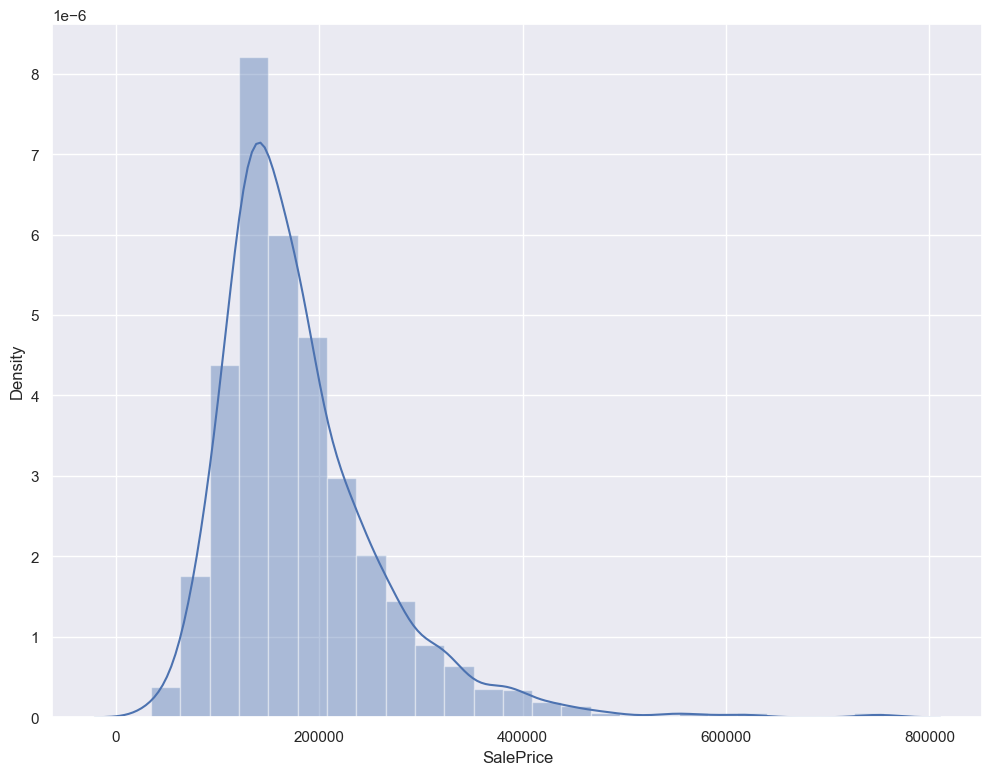

In [144]:
df.isnull().sum()
sns.set(rc={'figure.figsize':(12,9)})
sns.distplot(df['SalePrice'], bins=25)
plt.show()

/var/folders/hy/trs9bdtd1b71brzd00khd6xr0000gp/T/ipykernel_48442/4199518374.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


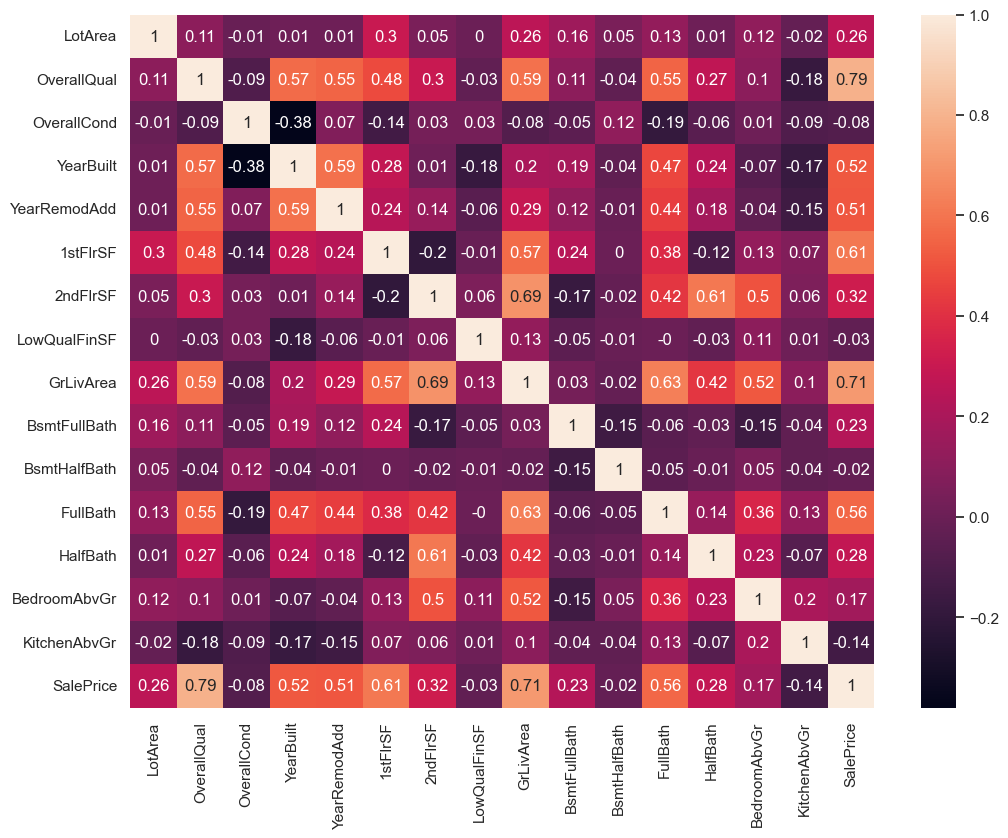

In [146]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()
